# Logistic Regression with Adult Salary
We will be working with the UCI adult dataset. We will be attempting to predict if people in the data set belong in a certain class by salary, either making <=50k or >50k per year.

In [1]:
adult <- read.csv('adult_sal.csv')
head(adult)

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
any(is.na(adult))

[1] FALSE

In [3]:
library(dplyr)
adult <- select(adult, -X)
head(adult)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

In [5]:
summary(adult)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

In [6]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

In [7]:
rewrite <- function(x, old, new) {
    if (x %in% old) {
        x <- new
    }
    return(x)
}

In [8]:
adult$type_employer <- as.character(adult$type_employer)

In [9]:
adult$type_employer <- sapply(adult$type_employer, rewrite, old = c('Never-worked', 'Without-pay'), new = 'Unemployed')

In [10]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

In [11]:
adult$type_employer <- sapply(adult$type_employer, rewrite, old = c('Local-gov', 'State-gov'), new = 'SL-gov')
adult$type_employer <- sapply(adult$type_employer, rewrite, old = c('Self-emp-inc', 'Self-emp-not-inc'), new = 'self-emp')
table(adult$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

In [12]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

In [13]:
adult$marital <- as.character(adult$marital)
adult$marital <- sapply(adult$marital, rewrite, old = c('Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'), new = 'Married')
adult$marital <- sapply(adult$marital, rewrite, old = c('Divorced', 'Widowed', 'Separated'), new = 'Not-Married')
table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

In [14]:
table(adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

In [15]:
dim(distinct(adult, country))

[1] 42  1

In [16]:
asia <- c('Iran', 'Japan', 'Philippines', 'Taiwan', 'Vietnam', 'Cambodia', 'China', 'Hong', 'India', 'Laos', 'Thailand', 'South')
north_america <- c('Canada', 'Outlying-US(Guam-USVI-etc)', 'United-States')
latin_south_america <- c('Columbia', 'Dominican-Republic', 'El-Salvador', 'Haiti', 'Honduras', 'Mexico', 'Trinadad&Tobago', 'Cuba', 'Ecuador', 'Guatemala', 'Jamaica', 'Nicaragua', 'Peru', 'Puerto-Rico')
europe <- c('France', 'Greece', 'Hungary', 'Italy', 'Portugal', 'Scotland', 'England', 'Germany', 'Holand-Netherlands', 'Ireland', 'Poland', 'Yugoslavia')
other <- c('?')

adult$country <- as.character(adult$country)
adult$country <- sapply(adult$country, rewrite, old = asia, new = 'Asia')
adult$country <- sapply(adult$country, rewrite, old = north_america, new = 'North_America')
adult$country <- sapply(adult$country, rewrite, old = latin_south_america, new = 'Latin_South_America')
adult$country <- sapply(adult$country, rewrite, old = europe, new = 'Europe')
adult$country <- sapply(adult$country, rewrite, old = other, new = 'Other')

In [17]:
table(adult$country)


               Asia              Europe Latin_South_America       North_America 
                751                 521                1401               29305 
              Other 
                583 

In [18]:
adult$country <- factor(adult$country)
adult$marital <- factor(adult$marital)
adult$type_employer <- factor(adult$type_employer)
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "?","Federal-gov",..: 5 4 3 3 3 3 3 4 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Married","Never-married",..: 2 1 3 1 1 1 1 1 2 1 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 4

In [19]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.3.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [20]:
write.csv(adult, file = 'temp.csv', row.names=FALSE)

In [21]:
adult2 <- read.csv('temp.csv', na.strings=c('?', ' ?'))

In [22]:
any(is.na(adult2))

[1] TRUE

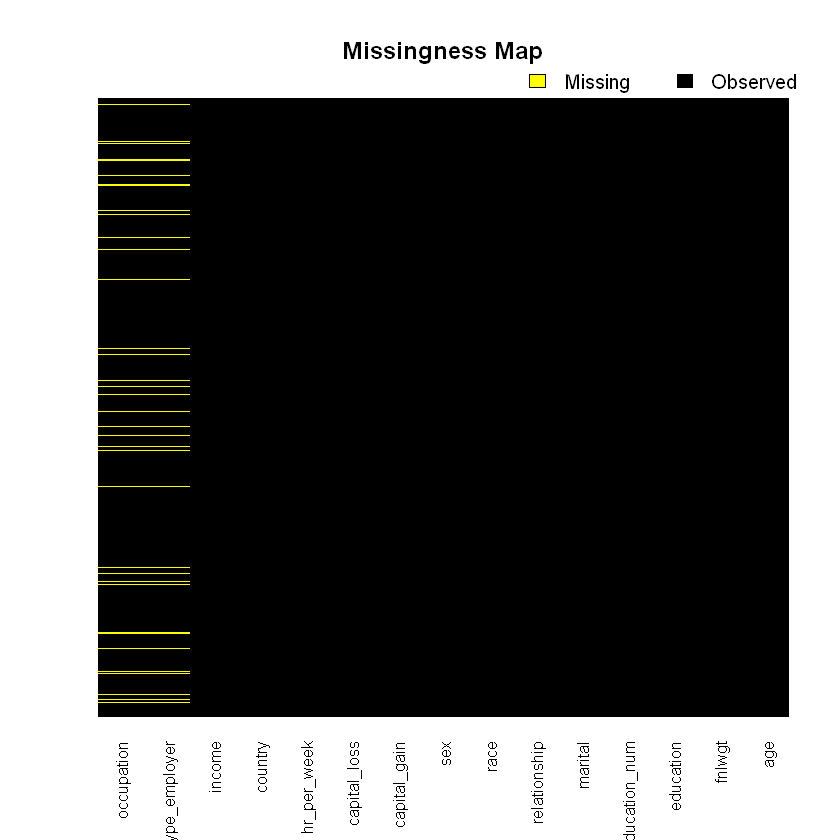

In [23]:
missmap(adult2, col = c('yellow', 'black'), y.at = c(1), y.labels = c(''))

In [24]:
dim(filter(adult2, is.na(type_employer)))

[1] 1836   15

In [25]:
dim(filter(adult2, is.na(occupation)))

[1] 1843   15

In [26]:
dim(adult2)

[1] 32561    15

In [27]:
adult3 <- na.omit(adult2)
dim(adult3)

[1] 30718    15

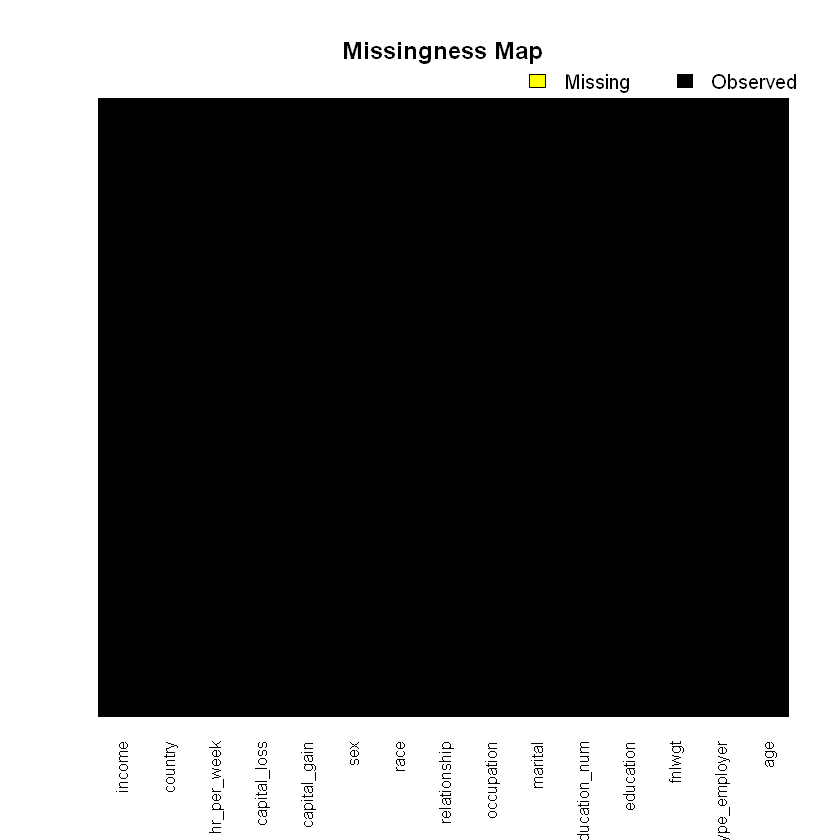

In [28]:
missmap(adult3, col = c('yellow', 'black'), y.at = c(1), y.labels = c(''))

In [29]:
str(adult3)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "Federal-gov",..: 4 3 2 2 2 2 2 3 2 2 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Married","Never-married",..: 2 1 3 1 1 1 1 1 2 1 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 

In [30]:
library(ggplot2)

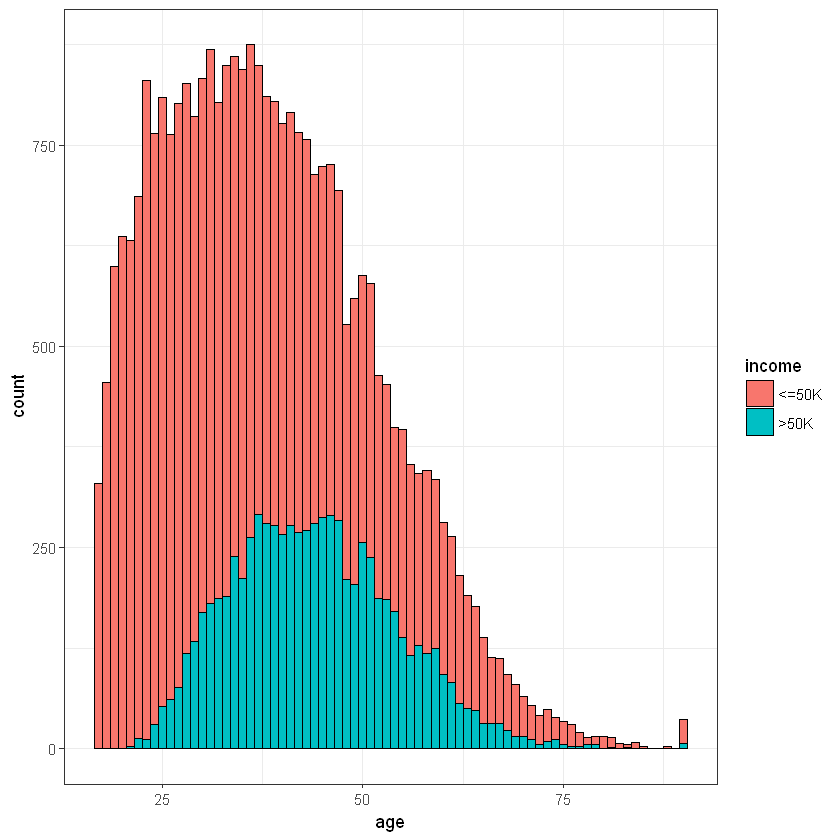

In [31]:
ggplot(adult3, aes(age)) + geom_histogram(aes(fill=income), binwidth = 1, color='black') + theme_bw()

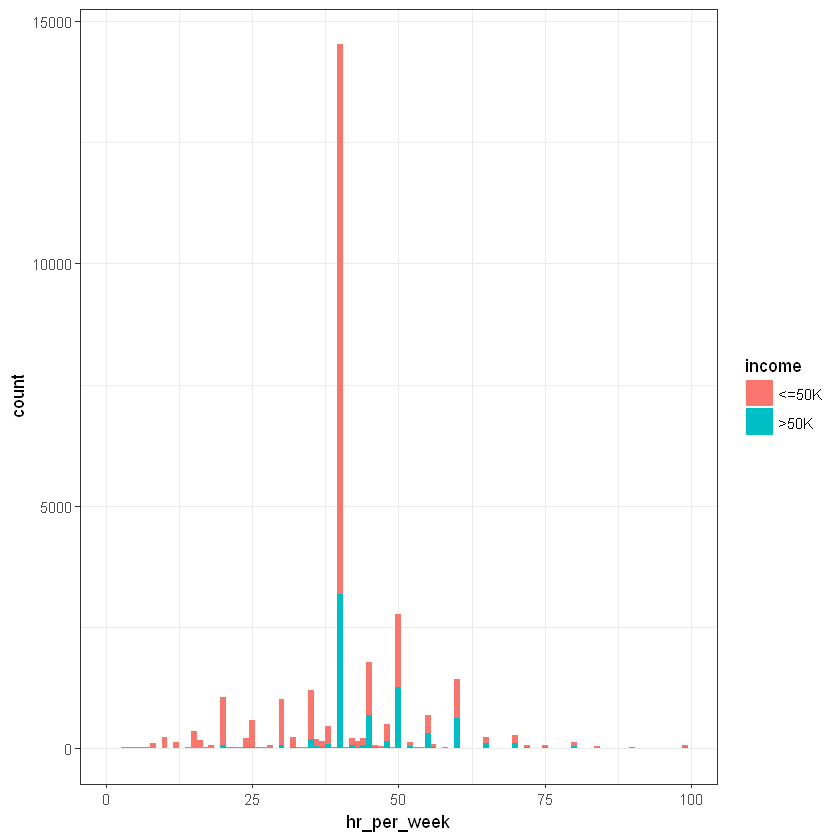

In [32]:
ggplot(adult3, aes(hr_per_week)) + geom_histogram(aes(fill=income), binwidth = 1) + theme_bw()

In [33]:
adult3 <- rename(adult3, region = country)

In [34]:
head(adult3)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,<=50K
50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North_America,<=50K
38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,<=50K
53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,<=50K
28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin_South_America,<=50K
37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North_America,<=50K


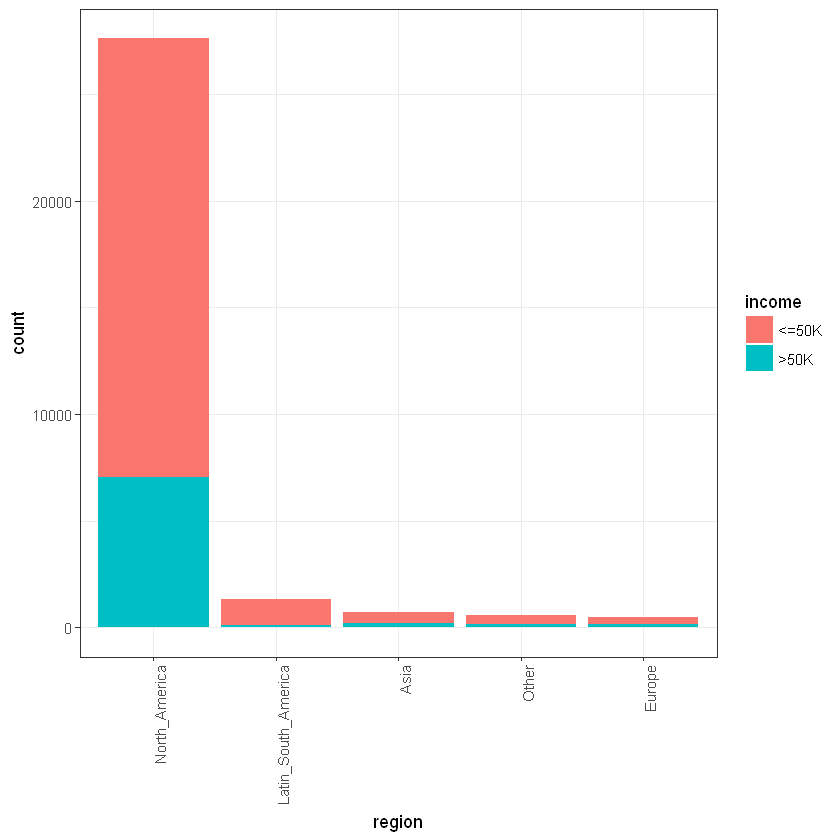

In [35]:
pl <- ggplot(adult3, aes(reorder(region, region, function(x)-length(x)))) + geom_bar(aes(fill=income)) + theme_bw()
pl + xlab('region') + theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [36]:
library(caTools)

In [37]:
split <- sample.split(adult3$income, SplitRatio = 0.7)

In [38]:
train <- subset(adult3, split==T)
test <- subset(adult3, split==F)

In [39]:
help(glm)

In [40]:
model <- glm(income ~ ., family = binomial(link = 'logit'), train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [41]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0330  -0.5163  -0.1934  -0.0001   3.6265  

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -5.785e+00  4.383e-01 -13.200  < 2e-16 ***
age                          2.797e-02  1.988e-03  14.068  < 2e-16 ***
type_employerPrivate        -4.593e-01  1.102e-01  -4.169 3.06e-05 ***
type_employerself-emp       -7.452e-01  1.229e-01  -6.065 1.32e-09 ***
type_employerSL-gov         -7.391e-01  1.243e-01  -5.945 2.76e-09 ***
type_employerUnemployed     -1.391e+01  3.935e+02  -0.035 0.971809    
fnlwgt                       7.137e-07  2.060e-07   3.464 0.000533 ***
education11th                4.302e-02  2.418e-01   0.178 0.858757    
education12th                3.902e-01  3.043e-01   1.282 0.199696    
education1st-4th            -6.57

In [42]:
help(step)

In [43]:
new.model <- step(model)

Start:  AIC=14144.24
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Step:  AIC=14144.24
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance   AIC
- race           4    14044 14144
<none>                14036 14144
- fnlwgt         1    14048 14154
- region         4    14060 14160
- marital        2    14084 14188
- type_employer  4    14094 14194
- sex            1    14135 14241
- age            1    14236 14342
- capital_loss   1    14250 14356
- relationship   5    14278 14376
- hr_per_week    1    14277 14383
- occupation    13    14504 14586
- education     15    14718 14796
- capital_gain   1    15257 15363


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=14143.95
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance   AIC
<none>                14044 14144
- fnlwgt         1    14056 14154
- region         4    14074 14166
- marital        2    14092 14188
- type_employer  4    14101 14193
- sex            1    14144 14242
- age            1    14246 14344
- capital_loss   1    14259 14357
- relationship   5    14287 14377
- hr_per_week    1    14287 14385
- occupation    13    14516 14590
- education     15    14732 14802
- capital_gain   1    15262 15360


In [44]:
summary(new.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0258  -0.5170  -0.1945  -0.0001   3.6421  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -5.219e+00  3.030e-01 -17.228  < 2e-16 ***
age                          2.813e-02  1.988e-03  14.152  < 2e-16 ***
type_employerPrivate        -4.433e-01  1.097e-01  -4.041 5.33e-05 ***
type_employerself-emp       -7.271e-01  1.223e-01  -5.943 2.81e-09 ***
type_employerSL-gov         -7.293e-01  1.240e-01  -5.881 4.07e-09 ***
type_employerUnemployed     -1.388e+01  3.940e+02  -0.035 0.971901    
fnlwgt                       7.018e-07  2.041e-07   3.438 0.000585 ***
education11th                4.564e-02  2.419e-01   0.189 0.850307    

In [45]:
pred <- predict(new.model, test, type = 'response')

In [53]:
t <- table(test$income, pred > 0.5)
t

       
        FALSE TRUE
  <=50K  6426  494
  >50K    897 1398

In [55]:
TP <- t[2, 2]
TN <- t[1, 1]
FP <- t[1, 2]
FN <- t[2, 1]

In [56]:
accuracy <- (TP + TN) / (TP + TN + FP + FN)
accuracy

[1] 0.8490505

In [57]:
precision <- TN / (TN + FN)
precision

[1] 0.8775092

In [58]:
recall <- TN / (TN + FP)
recall

[1] 0.9286127

In [59]:
pred2 <- predict(model, test, type = 'response')
table(test$income, pred2 > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  <=50K  6426  494
  >50K    898 1397